In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [2]:
# import data
Drug = pd.read_csv(r"C:\Users\visha\Downloads\drug200.csv")
Drug.tail(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
190,58,M,HIGH,HIGH,18.991,DrugY
191,23,M,HIGH,HIGH,8.011,drugA
192,72,M,LOW,HIGH,16.310,DrugY
193,72,M,LOW,HIGH,6.769,drugC
194,46,F,HIGH,HIGH,34.686,DrugY
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [3]:
# basic statisics
Drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
# check if there are any null values
Drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot:title={'center':' Drugs taken by Age'}, xlabel='Age', ylabel='Count'>

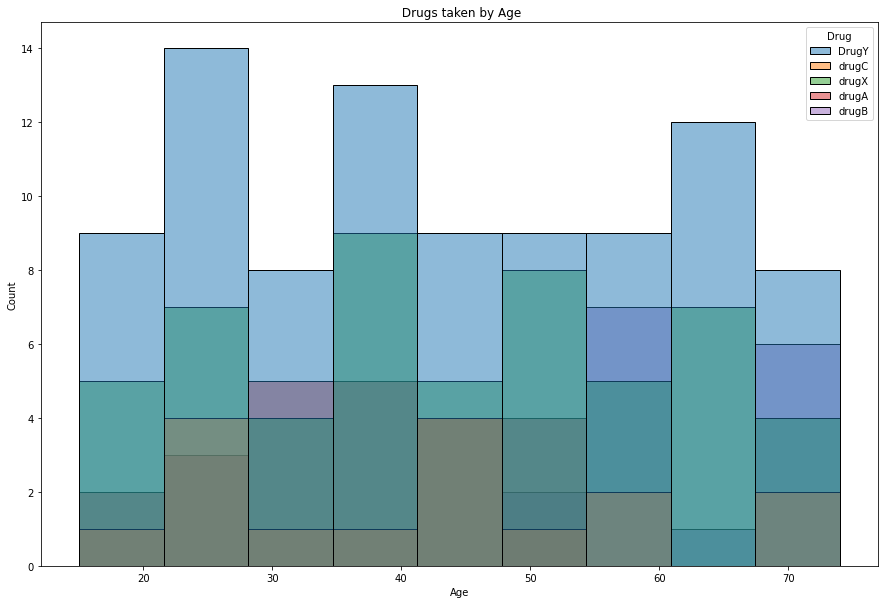

In [5]:
# create stacked column chart for drugs taken by age
plt.figure(figsize=(15,10))
plt.title(" Drugs taken by Age")
sns.histplot(x = "Age", hue = "Drug", data = Drug)

<AxesSubplot:title={'center':'Drug taken by Sex'}, xlabel='Sex', ylabel='Count'>

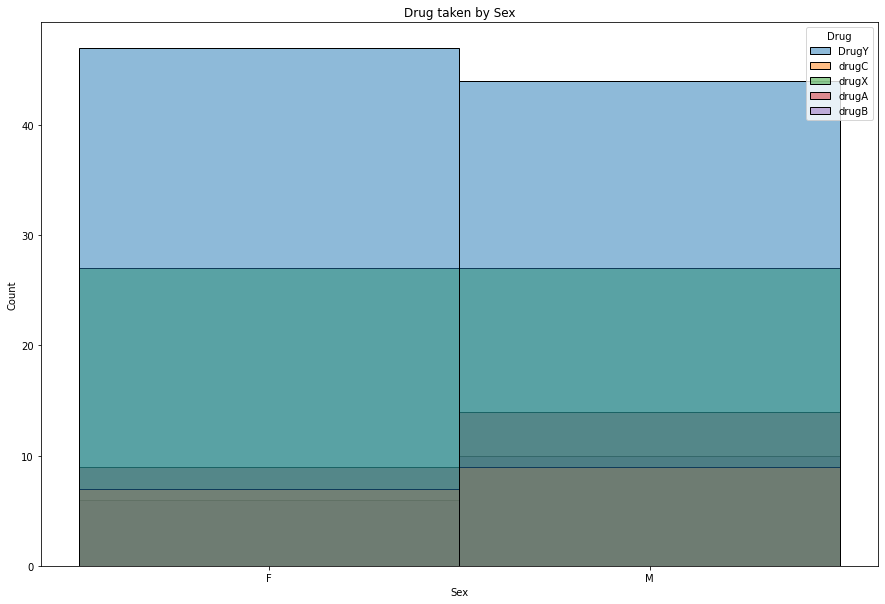

In [6]:
# create stacked column chart for drugs taken by sex
plt.figure(figsize=(15,10))
plt.title("Drug taken by Sex")
sns.histplot(x = "Sex", hue = "Drug", data = Drug)

<AxesSubplot:title={'center':' Drugs taken by blood pressure levels'}, xlabel='BP', ylabel='Count'>

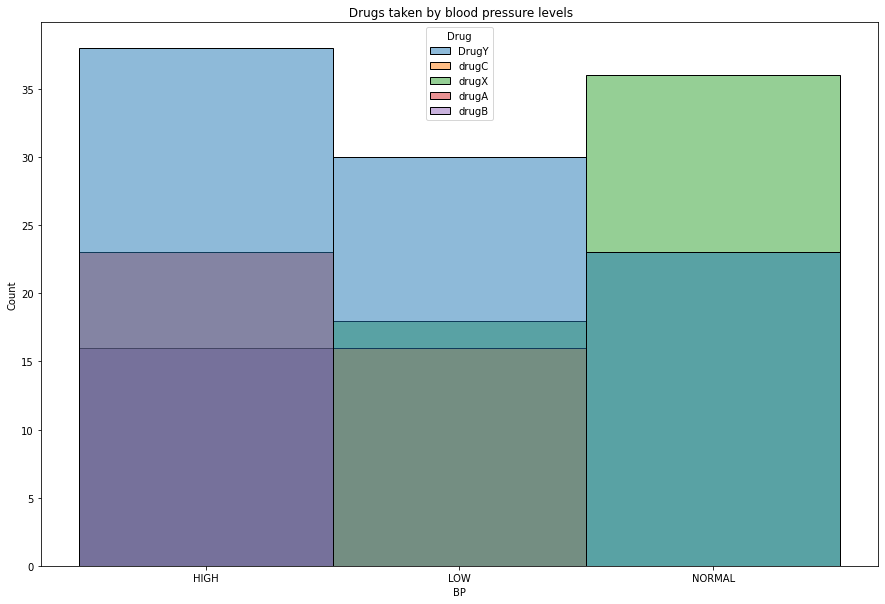

In [7]:
# create stacked column chart for drugs taken by BP
plt.figure(figsize=(15,10))
plt.title(" Drugs taken by blood pressure levels")
sns.histplot(x = "BP", hue = "Drug", data = Drug)

<AxesSubplot:title={'center':' Drugs taken by cholesterol levels'}, xlabel='Cholesterol', ylabel='Count'>

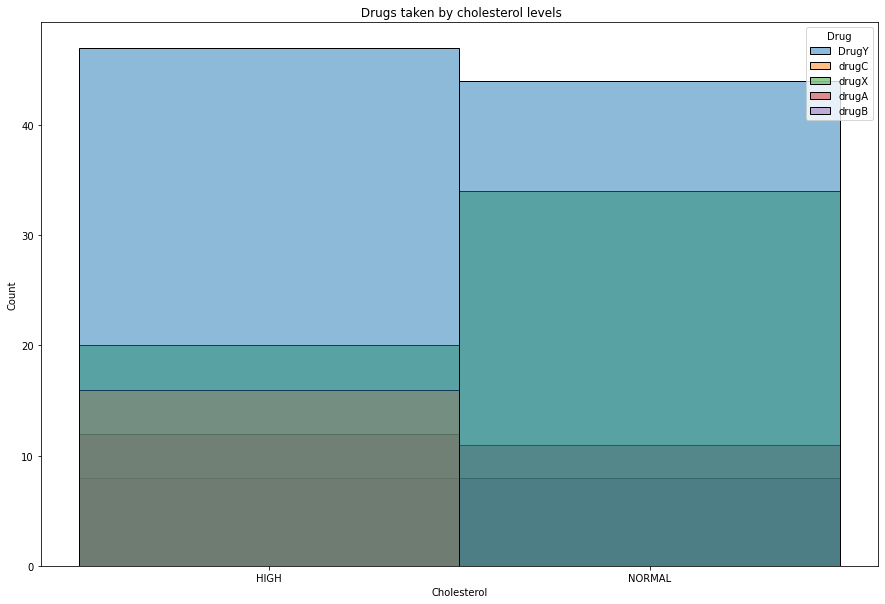

In [8]:
# create stacked column chart for drugs taken by chloesterol levels
plt.figure(figsize=(15,10))
plt.title(" Drugs taken by cholesterol levels")
sns.histplot(x = "Cholesterol", hue = "Drug", data = Drug)

<AxesSubplot:title={'center':' Drugs taken by the concentration of sodium to potassium'}, xlabel='Na_to_K', ylabel='Count'>

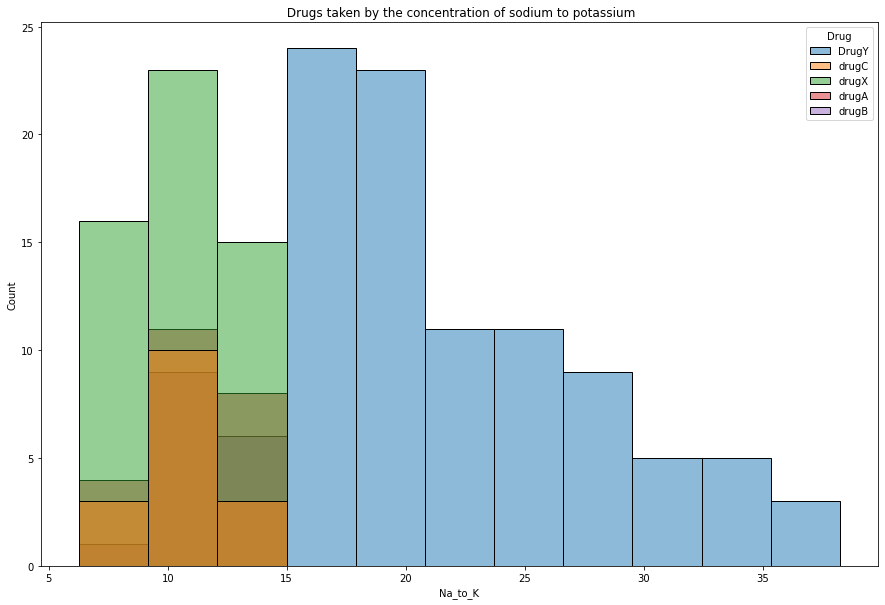

In [9]:
# create stacked column chart for drugs taken by the concentration of sodium to potassium
plt.figure(figsize=(15,10))
plt.title(" Drugs taken by the concentration of sodium to potassium")
sns.histplot(x = "Na_to_K", hue = "Drug", data = Drug)

In [10]:
# change sex to integers for modeling
def gender_to_numeric(x):
    if x == 'M': return 1
    if x == 'F': return 2

Drug['Gender'] = Drug['Sex'].apply(gender_to_numeric)
print(Drug)

     Age Sex      BP Cholesterol  Na_to_K   Drug  Gender
0     23   F    HIGH        HIGH   25.355  DrugY       2
1     47   M     LOW        HIGH   13.093  drugC       1
2     47   M     LOW        HIGH   10.114  drugC       1
3     28   F  NORMAL        HIGH    7.798  drugX       2
4     61   F     LOW        HIGH   18.043  DrugY       2
..   ...  ..     ...         ...      ...    ...     ...
195   56   F     LOW        HIGH   11.567  drugC       2
196   16   M     LOW        HIGH   12.006  drugC       1
197   52   M  NORMAL        HIGH    9.894  drugX       1
198   23   M  NORMAL      NORMAL   14.020  drugX       1
199   40   F     LOW      NORMAL   11.349  drugX       2

[200 rows x 7 columns]


In [11]:
# delete sex column
del Drug['Sex']
Drug

,Age,BP,Cholesterol,Na_to_K,Drug,Gender
0,23,HIGH,HIGH,25.355,DrugY,2
1,47,LOW,HIGH,13.093,drugC,1
2,47,LOW,HIGH,10.114,drugC,1
3,28,NORMAL,HIGH,7.798,drugX,2
4,61,LOW,HIGH,18.043,DrugY,2
...,...,...,...,...,...,...
195,56,LOW,HIGH,11.567,drugC,2
196,16,LOW,HIGH,12.006,drugC,1
197,52,NORMAL,HIGH,9.894,drugX,1
198,23,NORMAL,NORMAL,14.020,drugX,1


In [12]:
# change blood levels to integers for modeling
def Blood_Pre(x):
    if x == 'HIGH': return 1
    if x == 'NORMAL': return 2
    if x == 'LOW': return 3

Drug['BloodPressure'] = Drug['BP'].apply(Blood_Pre)
print(Drug)

     Age      BP Cholesterol  Na_to_K   Drug  Gender  BloodPressure
0     23    HIGH        HIGH   25.355  DrugY       2              1
1     47     LOW        HIGH   13.093  drugC       1              3
2     47     LOW        HIGH   10.114  drugC       1              3
3     28  NORMAL        HIGH    7.798  drugX       2              2
4     61     LOW        HIGH   18.043  DrugY       2              3
..   ...     ...         ...      ...    ...     ...            ...
195   56     LOW        HIGH   11.567  drugC       2              3
196   16     LOW        HIGH   12.006  drugC       1              3
197   52  NORMAL        HIGH    9.894  drugX       1              2
198   23  NORMAL      NORMAL   14.020  drugX       1              2
199   40     LOW      NORMAL   11.349  drugX       2              3

[200 rows x 7 columns]


In [13]:
# delete BP column
del Drug['BP']
Drug

,Age,Cholesterol,Na_to_K,Drug,Gender,BloodPressure
0,23,HIGH,25.355,DrugY,2,1
1,47,HIGH,13.093,drugC,1,3
2,47,HIGH,10.114,drugC,1,3
3,28,HIGH,7.798,drugX,2,2
4,61,HIGH,18.043,DrugY,2,3
...,...,...,...,...,...,...
195,56,HIGH,11.567,drugC,2,3
196,16,HIGH,12.006,drugC,1,3
197,52,HIGH,9.894,drugX,1,2
198,23,NORMAL,14.020,drugX,1,2


In [14]:
# change blood cholesterol to integers for modeling
def Blood_Chl(x):
    if x == 'HIGH': return 1
    if x == 'NORMAL' : return 2
    if x == 'LOW': return 3

Drug['BloodChloesterol'] = Drug['Cholesterol'].apply(Blood_Chl)
print(Drug)

     Age Cholesterol  Na_to_K   Drug  Gender  BloodPressure  BloodChloesterol
0     23        HIGH   25.355  DrugY       2              1                 1
1     47        HIGH   13.093  drugC       1              3                 1
2     47        HIGH   10.114  drugC       1              3                 1
3     28        HIGH    7.798  drugX       2              2                 1
4     61        HIGH   18.043  DrugY       2              3                 1
..   ...         ...      ...    ...     ...            ...               ...
195   56        HIGH   11.567  drugC       2              3                 1
196   16        HIGH   12.006  drugC       1              3                 1
197   52        HIGH    9.894  drugX       1              2                 1
198   23      NORMAL   14.020  drugX       1              2                 2
199   40      NORMAL   11.349  drugX       2              3                 2

[200 rows x 7 columns]


In [15]:
# delete cholesterol column
del Drug['Cholesterol']
Drug

,Age,Na_to_K,Drug,Gender,BloodPressure,BloodChloesterol
0,23,25.355,DrugY,2,1,1
1,47,13.093,drugC,1,3,1
2,47,10.114,drugC,1,3,1
3,28,7.798,drugX,2,2,1
4,61,18.043,DrugY,2,3,1
...,...,...,...,...,...,...
195,56,11.567,drugC,2,3,1
196,16,12.006,drugC,1,3,1
197,52,9.894,drugX,1,2,1
198,23,14.020,drugX,1,2,2


In [16]:
# rearrange columns in dataset
Drug = Drug[['Age','Gender','BloodChloesterol','BloodPressure','Na_to_K','Drug']]
Drug

,Age,Gender,BloodChloesterol,BloodPressure,Na_to_K,Drug
0,23,2,1,1,25.355,DrugY
1,47,1,1,3,13.093,drugC
2,47,1,1,3,10.114,drugC
3,28,2,1,2,7.798,drugX
4,61,2,1,3,18.043,DrugY
...,...,...,...,...,...,...
195,56,2,1,3,11.567,drugC
196,16,1,1,3,12.006,drugC
197,52,1,1,2,9.894,drugX
198,23,1,2,2,14.020,drugX


In [17]:
# create and reshape variables for the model
x1 = np.array(Drug["Gender"]).reshape(-1,1)
y1 = np.array(Drug["Drug"])

In [18]:
# train the model with training and test datasets
xtrain, xtest, ytrain, ytest = train_test_split(x1,y1, test_size = 0.10, random_state = 50)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [19]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

       DrugY       0.50      1.00      0.67        10
       drugA       0.00      0.00      0.00         1
       drugB       0.00      0.00      0.00         2
       drugX       0.00      0.00      0.00         7

    accuracy                           0.50        20
   macro avg       0.12      0.25      0.17        20
weighted avg       0.25      0.50      0.33        20



In [20]:
# create and reshape variables for the model
x2 = np.array(Drug["BloodChloesterol"]).reshape(-1,1)
y2 = np.array(Drug["Drug"])

In [21]:
# train the model with training and test datasets
xtrain, xtest, ytrain, ytest = train_test_split(x2,y2, test_size = 0.10, random_state = 50)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [22]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

       DrugY       0.50      1.00      0.67        10
       drugA       0.00      0.00      0.00         1
       drugB       0.00      0.00      0.00         2
       drugX       0.00      0.00      0.00         7

    accuracy                           0.50        20
   macro avg       0.12      0.25      0.17        20
weighted avg       0.25      0.50      0.33        20



In [23]:
# create and reshape variables for the model
x3 = np.array(Drug["BloodPressure"]).reshape(-1,1)
y3 = np.array(Drug["Drug"])

In [24]:
# train the model with training and test datasets
xtrain, xtest, ytrain, ytest = train_test_split(x3,y3, test_size = 0.10, random_state = 50)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [25]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

       DrugY       0.57      0.80      0.67        10
       drugA       0.00      0.00      0.00         1
       drugB       0.00      0.00      0.00         2
       drugX       0.67      0.57      0.62         7

    accuracy                           0.60        20
   macro avg       0.31      0.34      0.32        20
weighted avg       0.52      0.60      0.55        20



In [26]:
# create and reshape variables for the model
x = np.array(Drug[["Age","Na_to_K"]])
y = np.array(Drug["Drug"])

In [27]:
# train the model with training and test datasets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.10, random_state = 50)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [28]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        10
       drugA       0.00      0.00      0.00         1
       drugB       1.00      0.50      0.67         2
       drugC       0.00      0.00      0.00         0
       drugX       0.50      0.29      0.36         7

    accuracy                           0.65        20
   macro avg       0.50      0.36      0.41        20
weighted avg       0.78      0.65      0.69        20

